<a href="https://colab.research.google.com/github/atomiceltaweel/CV/blob/main/Copy_of_FE_for_Household_Power_Consumption_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Features Engineering for Household Power Consumption Data
![image](https://th.bing.com/th?id=OIF.L4s770oov%2fI1qxVfqg6NKg&pid=ImgDet&rs=1)

## **Attribute Information:**                                                        
> **1.date: Date in format dd/mm/yyyy**

> **2.time: time in format hh:mm:ss**

> **3.global_active_power: household global minute-averaged active power (in kilowatt)**                                                                   
> **4.global_reactive_power: household global minute-averaged reactive power (in kilowatt)**                                                                     
> **5.voltage: minute-averaged voltage (in volt)**    

> **6.global_intensity: household global minute-averaged current intensity (in ampere).**                                                                       
> **7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).**

> **8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.**

> **9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.**                  

In [ ]:
Agenda = {
    1:"Importing what we want",
    2:"Loading our data",
    3:"Looking at the data and fixing some problems",
    4:"Minssing values",
    5:"Distribute some columns",
    6:"Feature Selection",
    7:"Feature extraction",
    8:"Dimension Reduction"
}

Agenda

{1: 'Importing what we want',
 2: 'Loading our data',
 3: 'Looking at the data and fixing some problems',
 4: 'Minssing values',
 5: 'Distribute some columns',
 6: 'Feature Selection',
 7: 'Feature extraction',
 8: 'Dimension Reduction'}

## 1. Importing what we want 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib


# ignore the warnings
import warnings
warnings.filterwarnings('ignore')

## 2. Loading our data

In [ ]:
data = pd.read_csv("/content/02 Household Power Consumption.txt", sep = ";")
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
data.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
185706,24/4/2007,16:30:00,0.320,0.082,235.190,1.600,0.000,2.000,0.0
185707,24/4/2007,16:31:00,0.328,0.078,234.530,1.600,0.000,1.000,0.0
185708,24/4/2007,16:32:00,0.344,0.088,234.900,1.800,0.000,1.000,0.0
185709,24/4/2007,16:33:00,0.416,0.174,235.290,2.000,0.000,1.000,0.0
185710,24/4/2007,16:34:00,0.408,0.174,234.820,2.000,0.000,1.000,0.0


In [ ]:
shape_pefore = data.shape
shape_pefore #(Number of rows ,Number of columns)

(185711, 9)

## 3. Looking at the data and fixing some problems

In [ ]:
columns = data.columns

In [ ]:
list(data.columns)

['Date',
 'Time',
 'Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113607 entries, 0 to 113606
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   113607 non-null  object 
 1   Time                   113607 non-null  object 
 2   Global_active_power    113606 non-null  object 
 3   Global_reactive_power  113606 non-null  object 
 4   Voltage                113606 non-null  object 
 5   Global_intensity       113606 non-null  object 
 6   Sub_metering_1         113606 non-null  object 
 7   Sub_metering_2         113606 non-null  object 
 8   Sub_metering_3         113598 non-null  float64
dtypes: float64(1), object(8)
memory usage: 7.8+ MB


**The values of many columns is float not object so I will fix this problem**

In [ ]:
# I want to get to that point
data_type_dic = {
    "Date":object,
    "Time":object,
    "Global_active_power":float,
    "Global_reactive_power":float,
    "Voltag":float,
    "Global_intensity":float,
    "Sub_metering_1":float,
    "Sub_metering_2":float,
    "Sub_metering_3":float
}
data_type_dic

{'Date': object,
 'Time': object,
 'Global_active_power': float,
 'Global_reactive_power': float,
 'Voltag': float,
 'Global_intensity': float,
 'Sub_metering_1': float,
 'Sub_metering_2': float,
 'Sub_metering_3': float}

In [ ]:
"?" in data.values

True

In [ ]:
"  " in data.values

False

In [ ]:
# "?"
data = data.replace("?" , np.nan)
# " "
data = data.replace(" " , np.nan)
# "  "
data = data.replace("  " , np.nan)
# "   "
data = data.replace("   ", np.nan)

In [ ]:
# Global_active_power
data[["Global_active_power"]] = data[["Global_active_power"]].apply(pd.to_numeric)
# Global_reactive_power
data[["Global_reactive_power"]] = data[["Global_reactive_power"]].apply(pd.to_numeric)
# Voltage
data[["Voltage"]] = data[["Voltage"]].apply(pd.to_numeric)
# Global_intensity
data[["Global_intensity"]] = data[["Global_intensity"]].apply(pd.to_numeric)
# Sub_metering_1
data[["Sub_metering_1"]] = data[["Sub_metering_1"]].apply(pd.to_numeric)
# Sub_metering_2
data[["Sub_metering_2"]] = data[["Sub_metering_2"]].apply(pd.to_numeric)
# Sub_metering_3
data[["Sub_metering_3"]] = data[["Sub_metering_3"]].apply(pd.to_numeric)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113607 entries, 0 to 113606
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   113607 non-null  object 
 1   Time                   113607 non-null  object 
 2   Global_active_power    113598 non-null  float64
 3   Global_reactive_power  113598 non-null  float64
 4   Voltage                113598 non-null  float64
 5   Global_intensity       113596 non-null  float64
 6   Sub_metering_1         113598 non-null  float64
 7   Sub_metering_2         113598 non-null  float64
 8   Sub_metering_3         113598 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.8+ MB


## 4. Missing values

In [ ]:
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      1
Global_reactive_power    1
Voltage                  1
Global_intensity         1
Sub_metering_1           1
Sub_metering_2           1
Sub_metering_3           9
dtype: int64

In [ ]:
# drop rows iin data with null values
data = data.dropna(axis = 0, subset = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])

In [ ]:
# there is no missing data
data.isnull().sum().any()

False

In [ ]:
shape_after = data.shape
shape_after

(113598, 9)

In [ ]:
print(f"Let's remmember the first shape")
print(f"The shape of data pefore removing null is: {shape_pefore}")
print(f"The shape of data after removing null is: {shape_after}")
print(f"The totla removed rows are: {shape_pefore[0] - shape_after[0]}")

Let's remmember the first shape
The shape of data pefore removing null is: (113607, 9)
The shape of data after removing null is: (113598, 9)
The totla removed rows are: 9


In [ ]:
data.describe()

,Sub_metering_3
count,185702.000000
mean,6.553521
std,8.469009
min,0.000000
25%,0.000000
50%,0.000000
75%,17.000000
max,20.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2a7cf1950>,
      dtype=object)

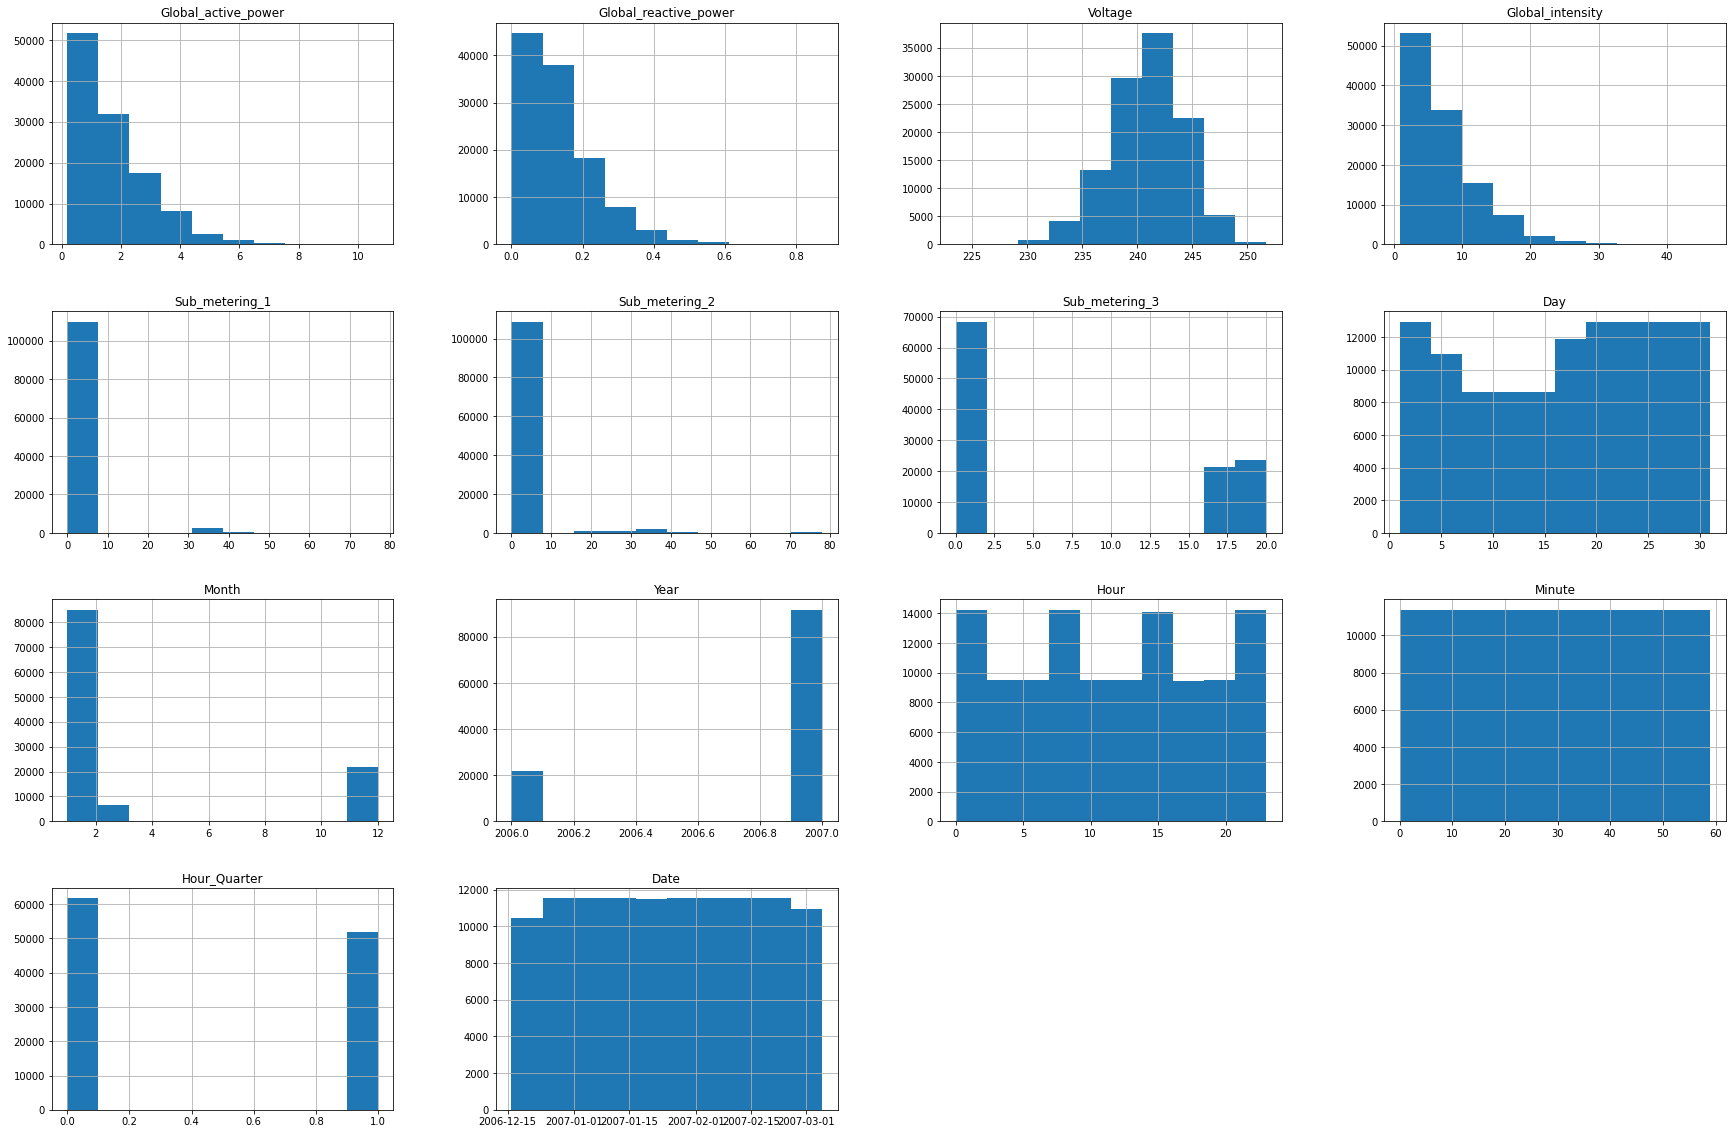

In [ ]:
data.hist(figsize = (30,20))
         

_Global_active_power   &&   Global_reactive_power   &&   Global_intensity is  Right Skewed Histogram (Mean > Median > Mode)= the frequency of observation lies to the left is the highest and most of the observations or data points lie to the right of the graph)
_Voltage  is normally distributed 

#**visualize the relationship among the features**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd29d742b50>,
      dtype=object)

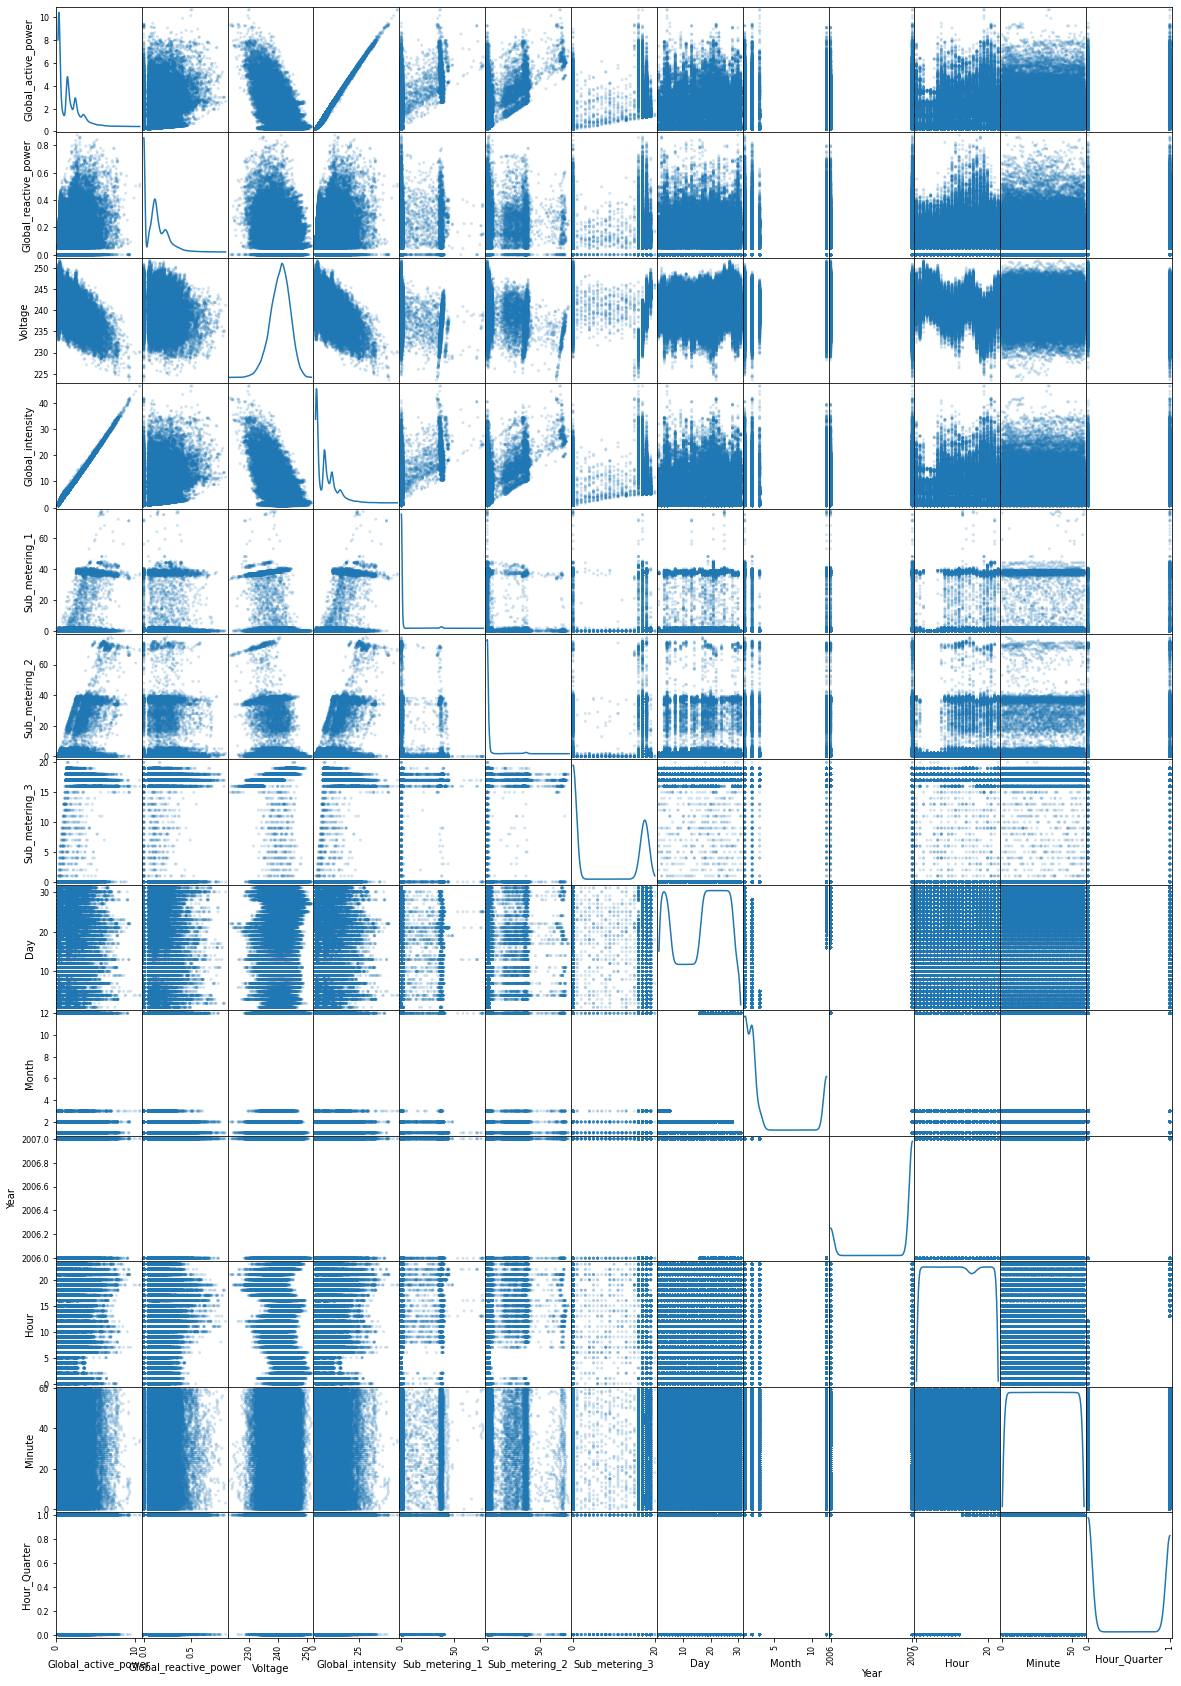

In [ ]:


scatter_matrix(data, alpha = 0.2, figsize = (20, 30), diagonal = 'kde')

## 5. Distribute some columns

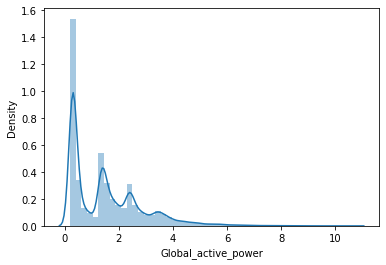

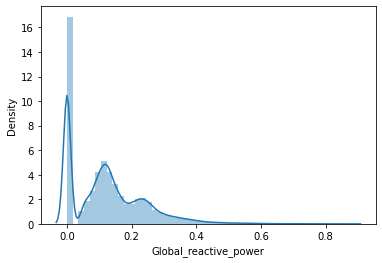

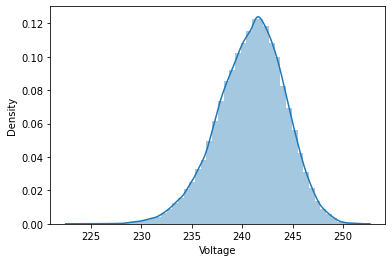

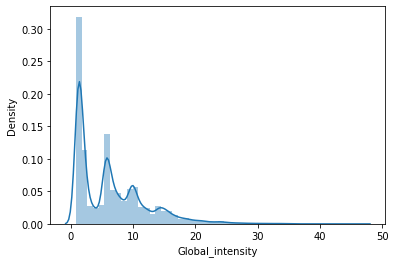

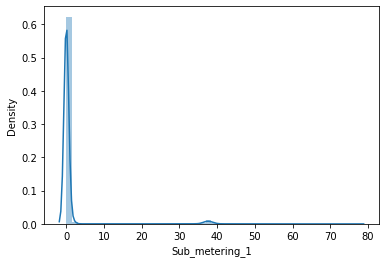

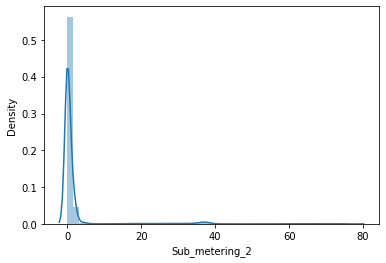

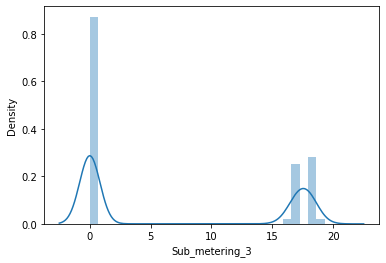

In [ ]:
for i, col in enumerate(data[['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]):
    plt.figure(i)
    plot = sns.distplot(data[col])
    # Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3' is alomst = 0 

## 6. Feature Selection

## 6.1 Feature Correlation

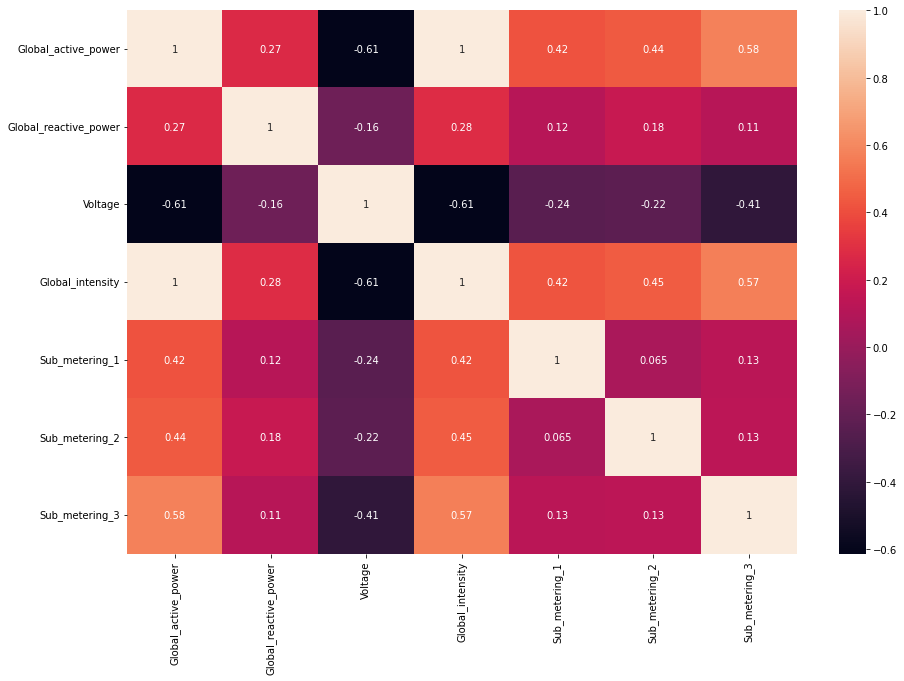

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(data[["Global_active_power","Global_reactive_power","Voltage","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"]].corr(), annot = True)

**It seems that the Voltage column is the least connected to the data, and therefore it is possible to get rid of it, so as not to cause confusion on the neural network that we will build in another stage later.**

In [ ]:
data = data.drop("Voltage", axis = 1)

In [ ]:
"Voltage" in data.columns

False

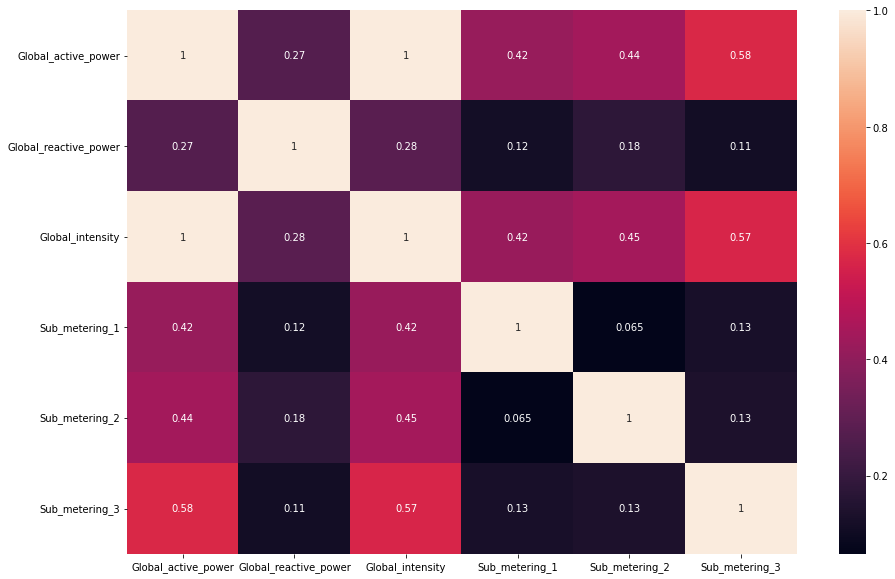

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(data[["Global_active_power","Global_reactive_power","Global_intensity","Sub_metering_1","Sub_metering_2","Sub_metering_3"]].corr(), annot = True)

## 7. Feature extraction

In [ ]:
data["Date"]=pd.to_datetime(data[['Year','Month','Day']],errors='coerce')


In [ ]:
data["Date"].value_counts()

24/1/2007     1440
2/2/2007      1440
9/2/2007      1440
8/2/2007      1440
7/2/2007      1440
              ... 
2/3/2007      1440
20/1/2007     1439
5/3/2007       891
16/12/2006     396
8                1
Name: Date, Length: 81, dtype: int64

In [ ]:
# this is inconsistant data so i must remove it
# here i show the spacific row
data[data["Date"] == "8"]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
49855,8,08:19:00,2.984,0.086,236.34,12.6,0.0,0.0,0.0


In [ ]:
# here I remove it 
data = data[data.Date != "8"]

In [ ]:
data[data["Date"] == "8"]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3


In [ ]:
# day column
def day(x):
    return x.split("/")[0]

# month column
def month(x):
    return x.split("/")[1]

# year column
def year(x):
    return x.split("/")[2]

In [ ]:
data['Day'] = data['Date'].apply(day)
data['Month'] = data['Date'].apply(month)
data['Year'] = data['Date'].apply(year)

In [ ]:
# hours column
def hour(x):
    return x.split(":")[0]

# miutes column
def minute(x):
    return x.split(":")[1]

In [ ]:
data["Time"].value_counts()

17:24:00    79
06:48:00    79
07:46:00    79
07:45:00    79
07:44:00    79
            ..
15:41:00    78
15:42:00    78
15:43:00    78
15:44:00    78
14:50:0      1
Name: Time, Length: 1441, dtype: int64

In [ ]:
data["Hour"] = data["Time"].apply(hour)
data["Minute"] = data["Time"].apply(minute)

In [ ]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Hour,Minute,Hour_Quarter
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16,12,2006,17,24,1
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16,12,2006,17,25,1
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,16,12,2006,17,26,1
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,16,12,2006,17,27,1
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,16,12,2006,17,28,1


In [ ]:
data["Hour"].value_counts()

05    4740
04    4740
12    4740
11    4740
10    4740
09    4740
07    4740
06    4740
18    4740
03    4740
02    4740
01    4740
00    4740
23    4740
22    4740
21    4740
20    4740
19    4740
13    4740
08    4739
14    4731
17    4716
15    4680
16    4680
Name: Hour, dtype: int64

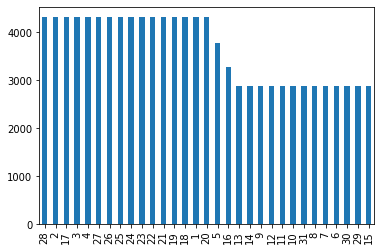

In [ ]:
data["Day"].value_counts().plot.bar()

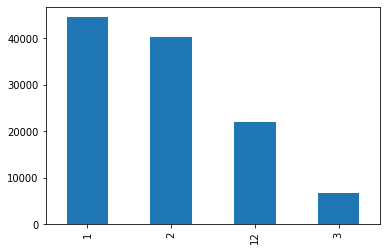

In [ ]:
data["Month"].value_counts().plot.bar()

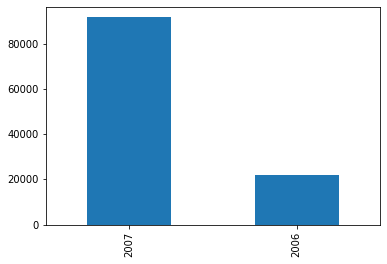

In [ ]:
data["Year"].value_counts().plot.bar()

**The data in front of us works according to the 24-hour system, but we need to convert it to the 12-hour system, i.e. night and morning, because this helps us in the analysis**

In [ ]:
# dividing the 24 hours into 12 hour 
# 0 refer into morning 
# 1 refer into night

def hour_quarter(x):
    if x <= '12':
        return 0
    else:
        return 1

In [ ]:
data["Hour_Quarter"] = data["Hour"].apply(hour_quarter)

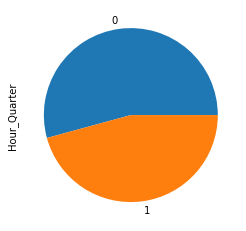

In [ ]:
data["Hour_Quarter"].value_counts().plot.pie()

In [ ]:
# converting some data types from object  into numeric type

# Day
data[["Day"]] = data[["Day"]].apply(pd.to_numeric)
# Month
data[["Month"]] = data[["Month"]].apply(pd.to_numeric)
# Year
data[["Year"]] = data[["Year"]].apply(pd.to_numeric)
# Minute
data[["Minute"]] = data[["Minute"]].apply(pd.to_numeric)
# Hour_Quarter
data[["Hour_Quarter"]] = data[["Hour_Quarter"]].apply(pd.to_numeric)
# Hour
data[["Hour"]] = data[["Hour"]].apply(pd.to_numeric)

In [ ]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Hour,Minute,Hour_Quarter
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16,12,2006,17,24,1
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16,12,2006,17,25,1
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,16,12,2006,17,26,1
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,16,12,2006,17,27,1
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,16,12,2006,17,28,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113606 entries, 0 to 113606
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Global_active_power    113597 non-null  float64       
 1   Global_reactive_power  113597 non-null  float64       
 2   Voltage                113597 non-null  float64       
 3   Global_intensity       113595 non-null  float64       
 4   Sub_metering_1         113597 non-null  float64       
 5   Sub_metering_2         113597 non-null  float64       
 6   Sub_metering_3         113597 non-null  float64       
 7   Day                    113606 non-null  int64         
 8   Month                  113606 non-null  int64         
 9   Year                   113606 non-null  int64         
 10  Hour                   113606 non-null  int64         
 11  Minute                 113606 non-null  int64         
 12  Hour_Quarter           113606 non-null  int6

In [ ]:
data.to_csv("final version.csv")

## 8. Dimension Reduction

**Now I will get rid of two columns, namely, the date and time. They played a key role in the process of data analysis, and it was possible for us to delve deeper into the data analysis to answer some questions. These two columns will be among the most influential columns in data analysis.**

**But in that case I will delete them now in order to implement one of the concepts of dimension reduction.**

In [ ]:
data = data.drop(["Date","Time"],axis=1)

In [ ]:
pca = PCA(n_components=3, svd_solver='full')
data = pca.fit_transform(data)
print('PCAModel Explained Variance ratio is : ' , pca.explained_variance_ratio_)
print('PCAModel singular value is : ' , pca.singular_values_)
print('PCAModel mean is : ' , pca.mean_)

ValueError: ignored

**Now the data processing step begins in order to build a machine learning algorithm, or an artificial neural network.**